<a href="https://colab.research.google.com/github/ranja-sarkar/SVM/blob/main/1c_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [44]:
X, y = make_classification(n_samples = 10000, n_features = 2, n_informative = 2,
                           n_redundant = 0, n_classes = 2,
                           n_clusters_per_class = 1,
                           weights = [0.98, 0.02], random_state = 0)

df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

In [45]:
df.sample(5)

,feature1,feature2,target
5970,1.592248,-0.068870,0
318,1.519977,0.234997,0
4983,0.888693,-0.934368,0
263,0.798093,-1.219701,0
7047,0.623027,-1.775749,0


In [47]:
#Split dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#print(y_train.shape[0],y_test.shape[0])

In [48]:
one_class_svm = OneClassSVM(nu = 0.01, kernel = 'rbf').fit(X_train)

In [49]:
one_class_svm.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.01,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

>> https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM

In [50]:
prediction = one_class_svm.predict(X_test)
prediction = [1 if i ==-1 else 0 for i in prediction]
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1957
           1       0.57      0.19      0.28        43

    accuracy                           0.98      2000
   macro avg       0.78      0.59      0.64      2000
weighted avg       0.97      0.98      0.97      2000



In [51]:
df_test = pd.DataFrame(X_test, columns = ['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['svm_predictions'] = prediction

print(df_test.head(5))

   feature1  feature2  y_test  svm_predictions
0  0.949402 -1.185085       0                0
1  0.481135 -2.075894       0                0
2  0.391663 -2.346017       0                0
3  1.562452  0.076659       0                0
4  1.165846 -0.931161       0                0


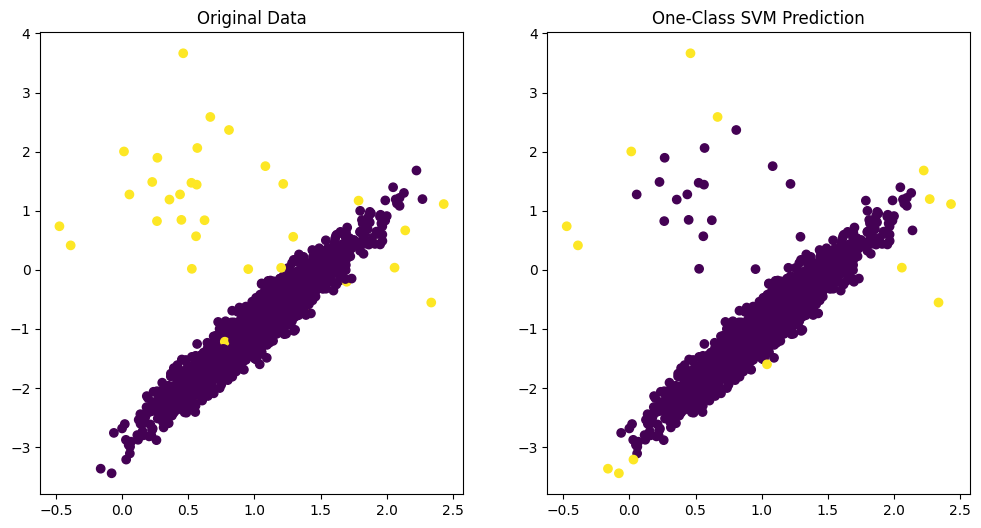

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
ax1.set_title('Original Data')
ax1.scatter(df_test['feature1'], df_test['feature2'], c = df_test['y_test'], label =True)
ax2.set_title('One-Class SVM Prediction')
ax2.scatter(df_test['feature1'], df_test['feature2'], c = df_test['svm_predictions'], label = True)

In [53]:
#score, score_threshold = one_class_svm.score_samples(X_test), np.percentile(score, 2)
#print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')

Oclass_svm0 = OneClassSVM(nu = 0.02).fit(X_train)

In [54]:
Oclass_svm0.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.02,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [55]:
prediction = Oclass_svm0.predict(X_test)
prediction = [1 if i ==-1 else 0 for i in prediction]
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1957
           1       0.57      0.40      0.47        43

    accuracy                           0.98      2000
   macro avg       0.78      0.69      0.73      2000
weighted avg       0.98      0.98      0.98      2000



In [56]:
df_test = pd.DataFrame(X_test, columns = ['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['svm_predictions'] = prediction

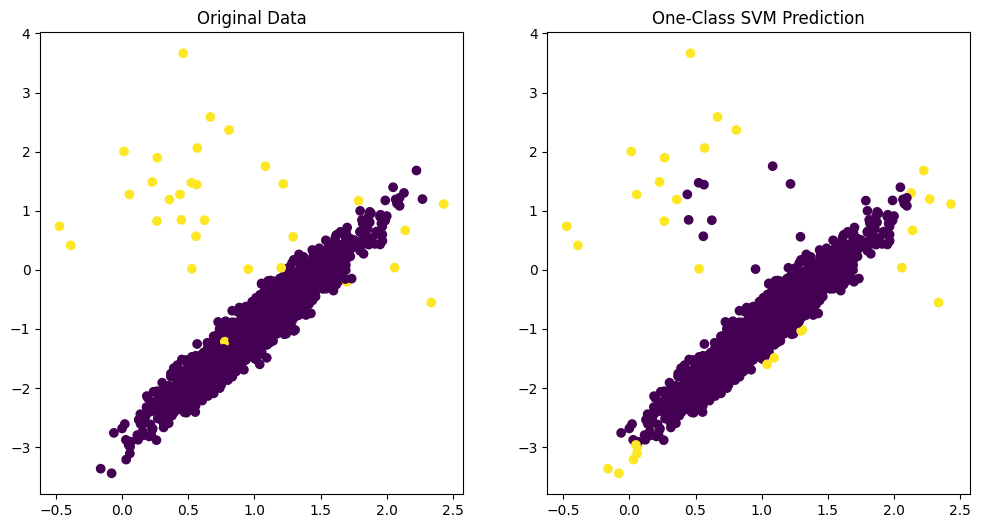

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
ax1.set_title('Original Data')
ax1.scatter(df_test['feature1'], df_test['feature2'], c = df_test['y_test'])
ax2.set_title('One-Class SVM Prediction')
ax2.scatter(df_test['feature1'], df_test['feature2'], c = df_test['svm_predictions'])

>> https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection